# Дисбаланс амплітуд та зсув фази між каналами І та Q приймача FobosSDR другої ревізії

## Умови

- FobosSDR rev. 2
- модифікований драйвер https://github.com/fobos777/libfobos (заснований на офіційній версії v2.3.1); зібраний з
  ```c
  static const bool CALIBRATION_DEBUG_GAINS = true;
  static const bool CALIBRATION_DEBUG_SIGNAL = true;
  ```
- термінатори на обох HF входах;
- FM bandstop фільтр перед RF входом;
- SDRAngel v7.22.1-51-g6c617be7d Qt 6.7.2 64b x86_64 Fedora Linux 40 (Workstation Edition) (4k FFT, avg. type: Fix, avg. num. samples: 100).

## Метод

- процедура калібрування відповідно до http://argus.naapo.org/~rchilders/swe_argus_pubs/iqbal.pdf
- калібрування здійснюється сигналом LO міксера rffc5072 налаштованого з відступом +5 МГц від частоти LO max2830; преселектор вимкнений;
- частота дискретизації 50 МГц, центральна - 3 ГГц (на результат не впливає);
- вимірювання здійснені через не менше ніж 20 хвилин після встановлення значення підсилення, щоб дати приймачу досягти стаціонарного температурного режиму;
- 7 вимірювань на кожне значення підсилення.

## Вплив підсилення LNA (підсилення VGA 0 дБ)

### Приклади спектрів

| Значення підсилення |    Приклад спектру сигналу LO RFFC5072 після калібрування    |
|:-------------------:|:------------------------------------------------------------:|
|       Низьке        | 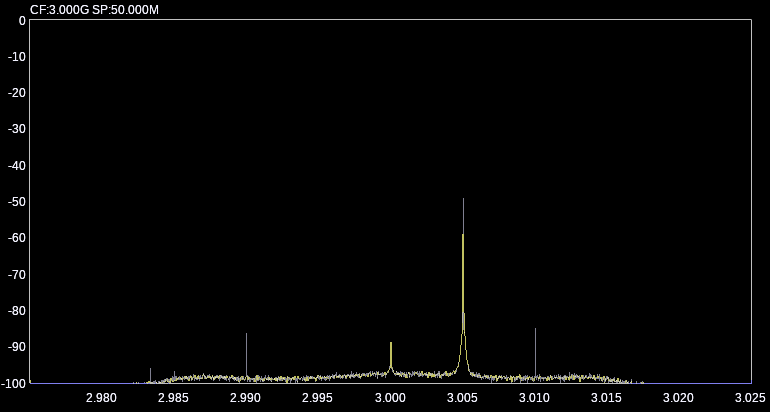 |
|       Середнє       | 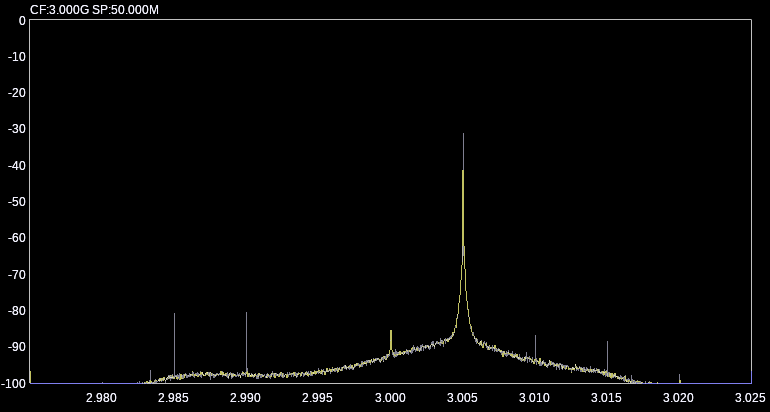 |
|       Високе        | 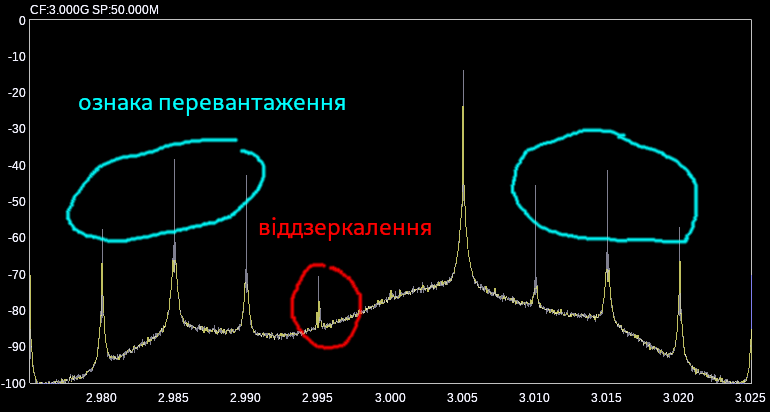 |

### Данні

In [1]:
import numpy as np
import pandas as pd

In [2]:

iq_ratio_vs_lna_gain = {
    "low": 1.0 / np.array([0.828288, 0.827659, 0.827625, 0.827079, 0.825775, 0.824789, 0.826124]),
    "medium": 1.0 / np.array([0.820859, 0.820455, 0.820289, 0.820612, 0.819975, 0.820943, 0.820074]),
    "high": 1.0 / np.array([0.942275, 0.941418, 0.941984, 0.943072, 0.942245, 0.941296, 0.941511]),
}

iq_phi_vs_lna_gain = {
    "low": np.rad2deg(np.arcsin(np.array([0.012154, 0.012369, 0.012014, 0.012111, 0.012674, 0.012847, 0.012424]))),
    "medium": np.rad2deg(np.arcsin(np.array([-0.011024, -0.011668, -0.010905, -0.011678, -0.011677, -0.010719, -0.009974]))),
    "high": np.rad2deg(np.arcsin(np.array([-0.035609, -0.037184, -0.037097, -0.037027, -0.037042, -0.035510,  -0.037000]))),
}

### Залежність співвідношення амплітуд I/Q від підсилення LNA

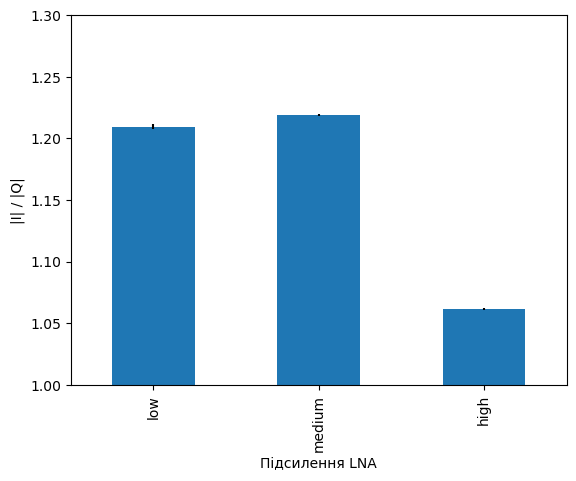

In [3]:
pd_iq_ratio_vs_lna_gain = pd.DataFrame.from_dict(iq_ratio_vs_lna_gain)
stds = pd_iq_ratio_vs_lna_gain.std(axis=0)
plot = pd_iq_ratio_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="|I| / |Q|", xlabel="Підсилення LNA", ylim=(1.0, 1.3), yerr=stds)

### Залежність зсуву фази Q відносно І в залежності від підсилення LNA

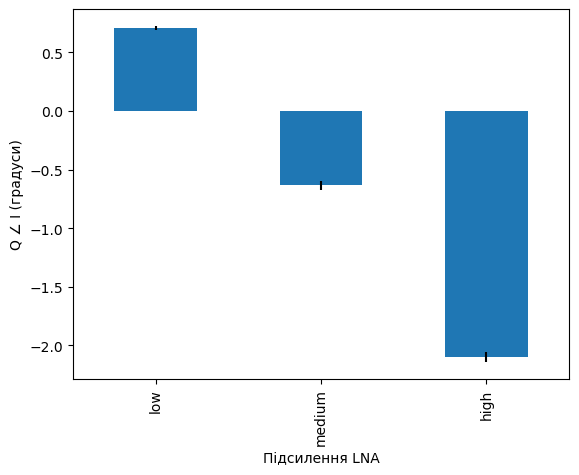

In [4]:
pd_iq_phi_vs_lna_gain= pd.DataFrame.from_dict(iq_phi_vs_lna_gain)
stds = pd_iq_phi_vs_lna_gain.std(axis=0)
plot = pd_iq_phi_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="Q ∠ І (градуси)",  xlabel="Підсилення LNA", yerr=stds)

### Залежність дисбалансу I/Q від часу з моменту під'єднання FobosSDR до комп'ютера (LNA low, VGA 0 dB)

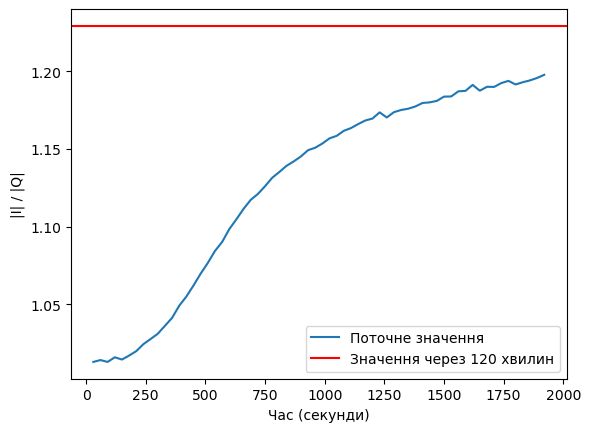

In [22]:
iq_ratio_vs_lna_gain = {
    "iq_ratio": 1.0 / np.array([0.987224, 0.986055, 0.987222, 0.984329, 0.985736, 0.983260, 0.980503, 0.976194, 0.973075, 0.969889, 0.965117, 0.960388, 0.953184, 0.947853, 0.941467, 0.934778, 0.928792, 0.922188, 0.917303, 0.910402, 0.905138, 0.899680, 0.895024, 0.892008, 0.888059, 0.883797, 0.880891, 0.877834, 0.875672, 0.873242, 0.870175, 0.868975, 0.866937, 0.864449, 0.863235, 0.860820,  0.859519, 0.857641, 0.855937, 0.855032, 0.852114, 0.854508, 0.852020, 0.851015, 0.850413, 0.849362, 0.847754, 0.847470, 0.846791, 0.844821, 0.844757, 0.842408, 0.842192, 0.839477, 0.842113, 0.840337, 0.840386, 0.838646, 0.837654, 0.839287, 0.838263, 0.837445, 0.836345, 0.834930]),
    "iq_phi": np.rad2deg(np.arcsin(np.array([0.015982, 0.015671, 0.014480, 0.015230, 0.014096, 0.014809, 0.014637, 0.012939, 0.014497, 0.014070, 0.014509, 0.015525, 0.013239, 0.013737, 0.013039, 0.014594, 0.014586, 0.013781, 0.014855, 0.014425, 0.013941, 0.012834, 0.013991, 0.013508, 0.014185, 0.014636, 0.014987, 0.014234, 0.013733, 0.012815, 0.012551, 0.013511, 0.013352, 0.014763, 0.014689, 0.014907, 0.014661, 0.014599, 0.014358, 0.012531, 0.012704, 0.013772, 0.014921, 0.013435, 0.013353, 0.014309, 0.012885, 0.013865, 0.014086, 0.013394, 0.014355, 0.013810, 0.013232, 0.013899, 0.013850, 0.012240, 0.013510, 0.014075, 0.014301, 0.014393, 0.014460, 0.013838, 0.012264, 0.013948]))),
    "time_sec": 30.0*np.arange(1, 65, 1)

}
pd_iq_ratio_vs_lna_gain = pd.DataFrame.from_dict(iq_ratio_vs_lna_gain)
plot = pd_iq_ratio_vs_lna_gain.plot("time_sec", "iq_ratio", xlabel="Час (секунди)", ylabel="|I| / |Q|", label="Поточне значення")
_ = plot.axhline(1.0 / 0.813556, c='r', label="Значення через 120 хвилин")
_ = plot.legend()

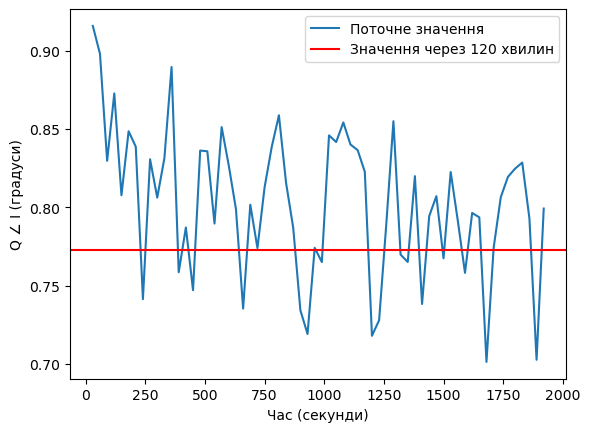

In [23]:
plot = pd_iq_ratio_vs_lna_gain.plot("time_sec", "iq_phi", xlabel="Час (секунди)", ylabel="Q ∠ І (градуси)", label="Поточне значення")
_ = plot.axhline(np.rad2deg(np.arcsin(0.013482)), c='r', label="Значення через 120 хвилин")
_ = plot.legend()